#Problem Statement 4: Efficient and fair line construction


Importing required libraries and functions for data visualization and computation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import AgglomerativeClustering
import math

Importing dataset and previewing it.

In [2]:
data=fetch_california_housing(as_frame=True)

data=data.frame

lat=np.array(data['Latitude'])
lon=np.array(data['Longitude'])

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Applying classical Linear Regression and Analysing its cost effective-ness.

In [3]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(lat.reshape(-1,1),lon.reshape(-1,1))
lon_pred=regr.predict(lat.reshape(-1,1))

predicting the line with simple regression here line(K) =1

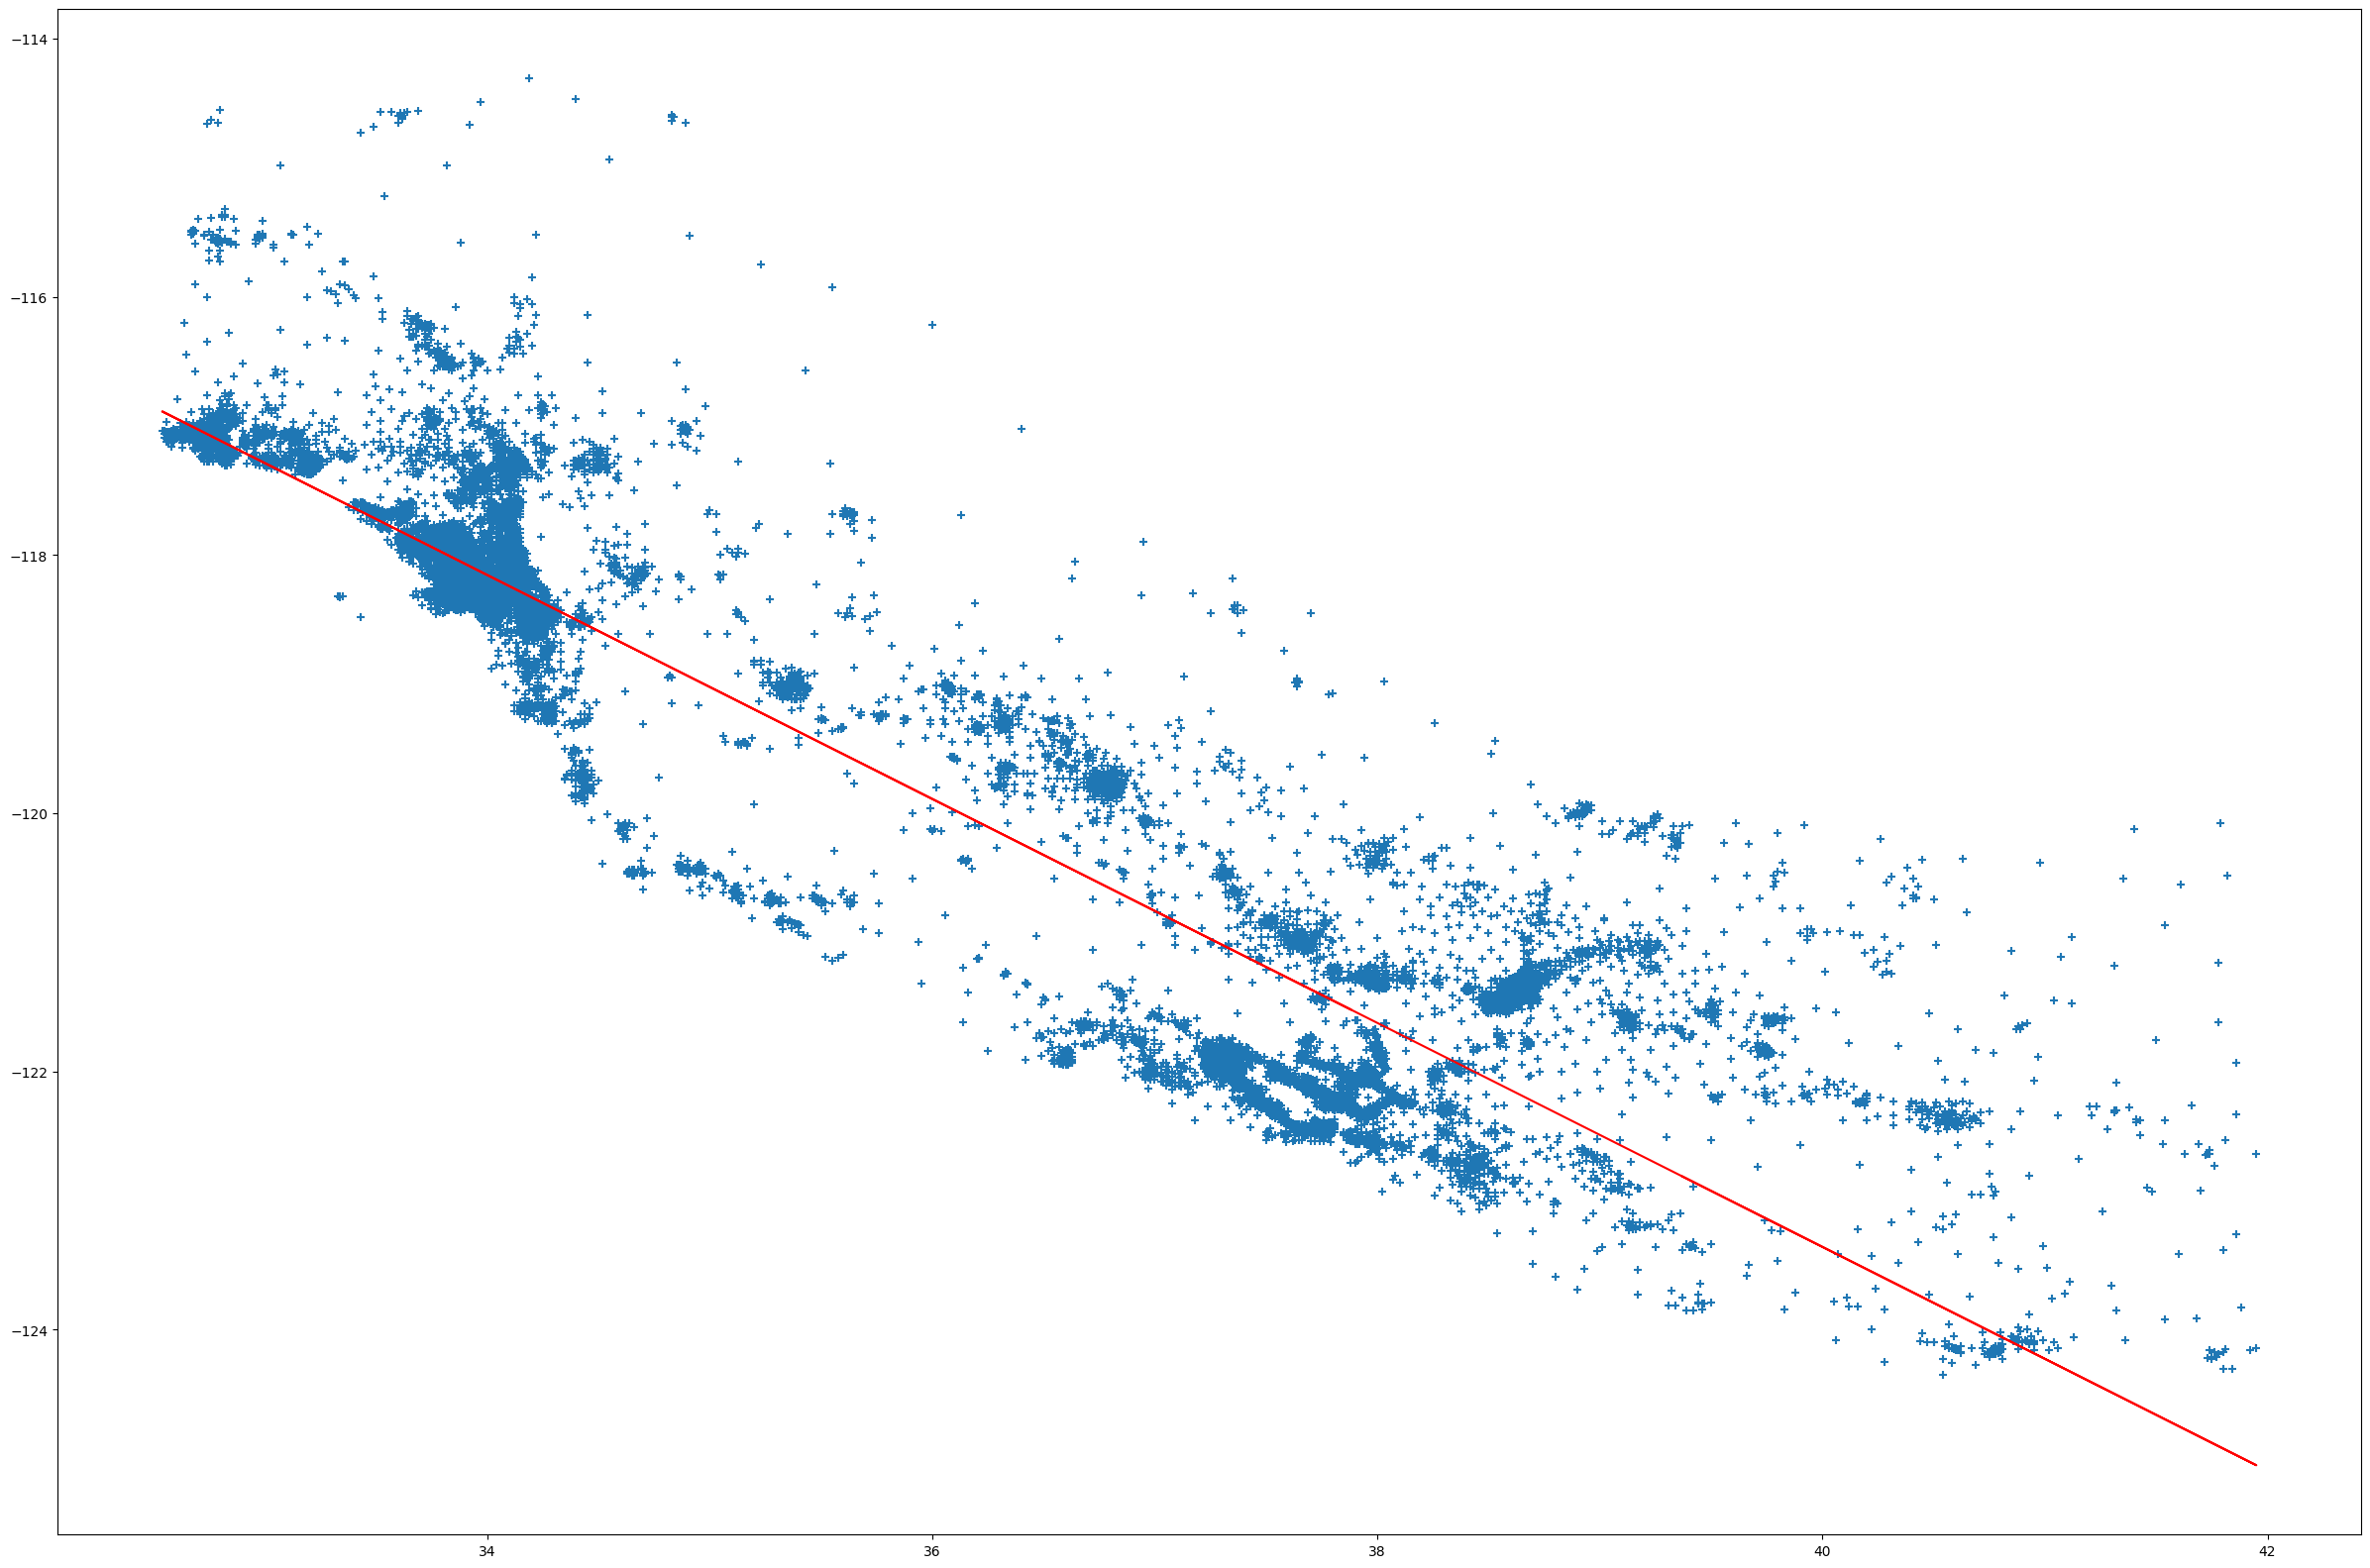

In [4]:
fig,axs=plt.subplots(1,figsize=(30,20))
axs.scatter(lat,lon,marker='+')
axs.plot(lat,lon_pred,color='red')

calculate_I_AP -it returns the value of (I-a.aT).(p-b)

norm- It finds the norm of the final resulting vector calculate_I_AP uses this norm function

all_lines-It returns the all possible traslation on map

getting_b-on a line we want to get all possible points for axis of rotation
get rotation-rotates the line about a particular b

Then the print is denoting all possible orientation of line in a 3 d matrix

In [5]:
def calculate_I_AP(a, p,b):
    x=np.transpose(a)
    A = np.multiply(a, x)
    I = np.eye(2)
    result = np.dot(I,p-b) - np.dot(A, p-b)
    return np.square(norm(result))


def norm(x):
  return np.linalg.norm(x)

def all_lines(slat,elat,slon,elon):
    lis=[];i=slat
    while i<elat+0.1:
        cur=[]
        j=slon
        while j<elon+0.1:
            cur.append((i,j))
            j+=0.5
        lis.append(np.array(cur))
        i+=0.5
    return np.array(lis)
#array containing values of tan(x) for x=0 degree, 10 degree......180 degree.
i_cap = np.array([0.0, 0.17632698070846498, 0.36397023426620234, 0.5773502691896257, 0.8390996311772799, 1.19175359259421, 1.7320508075688767, 2.7474774194546216, 5.671281819617707, 1.633123935319537e+16, -5.671281819617711, -2.7474774194546243, -1.7320508075688783, -1.19175359259421, -0.8390996311772804, -0.5773502691896263, -0.36397023426620256, -0.1763269807084649])


def get_rotation(point_x, point_y):
    l = []
    for i in i_cap:
        l.append(np.array([point_x,point_y]))
    return np.array(l)

def getting_b(points):

  x = points.shape[0]
  y = points.shape[0]

  result = []
  for i in range(x):
    temp2 = []
    for point in points[i]:
      temp = get_rotation(point[0], point[1])
      temp2.append(temp)
    result.append(np.array(temp2))

  return np.array(result)

ever=all_lines(min(lat),max(lat),min(lon),max(lon))
rotated=getting_b(ever)
print(rotated)
rotated.shape

[[[[  32.54 -124.35]
   [  32.54 -124.35]
   [  32.54 -124.35]
   ...
   [  32.54 -124.35]
   [  32.54 -124.35]
   [  32.54 -124.35]]

  [[  32.54 -123.85]
   [  32.54 -123.85]
   [  32.54 -123.85]
   ...
   [  32.54 -123.85]
   [  32.54 -123.85]
   [  32.54 -123.85]]

  [[  32.54 -123.35]
   [  32.54 -123.35]
   [  32.54 -123.35]
   ...
   [  32.54 -123.35]
   [  32.54 -123.35]
   [  32.54 -123.35]]

  ...

  [[  32.54 -115.35]
   [  32.54 -115.35]
   [  32.54 -115.35]
   ...
   [  32.54 -115.35]
   [  32.54 -115.35]
   [  32.54 -115.35]]

  [[  32.54 -114.85]
   [  32.54 -114.85]
   [  32.54 -114.85]
   ...
   [  32.54 -114.85]
   [  32.54 -114.85]
   [  32.54 -114.85]]

  [[  32.54 -114.35]
   [  32.54 -114.35]
   [  32.54 -114.35]
   ...
   [  32.54 -114.35]
   [  32.54 -114.35]
   [  32.54 -114.35]]]


 [[[  33.04 -124.35]
   [  33.04 -124.35]
   [  33.04 -124.35]
   ...
   [  33.04 -124.35]
   [  33.04 -124.35]
   [  33.04 -124.35]]

  [[  33.04 -123.85]
   [  33.04 -123.85]
   [

(20, 21, 18, 2)

Getting the values of all answers for lattitude,longitude we just need a point r and theta angle of rotation for that point  that point is nothing but b  which in turn is r so all the function written above will be used and we will get final value of answer in our self written regression code and this change all the 3 parameters at very slow rate so this code requires approx 96 minute runtime (approx) to see output of this function uncomment this line
      # calculated=final(min(lat),max(lat),min(lon),max(lon))
and the next cell.

In [6]:
def final(strtlat,endlat,strtlon,endlon):
    final_ans=[]
    curlat=strtlat
    while curlat<endlat+0.1:
        this_line=[]
        curlon=strtlon
        while curlon<endlon+0.1:
            this_point=[]
            for i in range(0,181,5):
                this_orn=0
                for p in range(len(lat)):
                    point=np.array([lat[p],lon[p]])
                    b=np.array([curlat,curlon])
                    a=np.array([1,math.tan(i*(math.pi)/180)])
                    this_orn+=calculate_I_AP(a,point,b)
                this_point.append(this_orn)
            this_line.append(np.array(this_point))
            curlon+=0.5
        final_ans.append(np.array(this_line))
        curlat+=0.5
    return np.array(final_ans)

#calculated=final(min(lat),max(lat),min(lon),max(lon))

The final function returns out us a matrix for each line but for final(final ans) we need minimum of each such line  this cell simply tells us the latitude longitude and rotation that is r and theta for plotting our model line

In [7]:
# print(calculated)
# shape=calculated.shape
# shape

# this=1e9
# ans=[]

# for i in range(20):
#     for j in range(21):
#         for k in range(19):
#             if calculated[i][j][k]<this:
#                 this=calculated[i][j][k]
#                 ans=[i,j,k]

# print(this)
# print(ans)


In [8]:
lat

array([37.88, 37.86, 37.85, ..., 39.43, 39.43, 39.37])

# Objective 1:Efficient Line

Calculating efficient line by translation of the line across latitudes and longitudes and rotation along various points.

And plotting the line.


Due to large time we have to change our deltas to a larger value (learning rate of model) now due to larger learning rate we need 5 minutes

In [9]:
def final(strtlat,endlat,strtlon,endlon):
    final_ans=[]
    curlat=strtlat
    while curlat<endlat+0.1:
        this_line=[]
        curlon=strtlon
        while curlon<endlon+0.1:
            this_point=[]
            for i in range(0,181,15):
                this_orn=0
                for p in range(len(lat)):
                    point=np.array([lat[p],lon[p]])
                    b=np.array([curlat,curlon])
                    a=np.array([1,math.tan(i*(math.pi)/180)])
                    this_orn+=calculate_I_AP(a,point,b)
                this_point.append(this_orn)
            this_line.append(np.array(this_point))
            curlon+=1.5
        final_ans.append(np.array(this_line))
        curlat+=1.5
    return np.array(final_ans)

calculated=final(min(lat),max(lat),min(lon),max(lon))

This is just getiing the latitude longitude and theta for that larger learning rate function for plotting line

In [10]:
calculated

starters=np.array([min(lat),min(lon),0])
tba=[]
val=1e18
for i in range(calculated.shape[0]):
    for j in range(calculated.shape[1]):
        for k in range(calculated.shape[2]):
            if calculated[i][j][k]<val:
                val=calculated[i][j][k]
                tba=[1.5*i,1.5*j,k*15]
tba=np.array(tba)
starters=starters+tba
print("Minimum Cost:",val)
print("Point b(latitude, longitude):",(starters[0],starters[1]))
print("Angle made by the direction vector with the latitude axis:",starters[2],"Degrees.")

Minimum Cost: 178804.7452000015
Point b(latitude, longitude): (35.54, -119.85)
Angle made by the direction vector with the latitude axis: 45.0 Degrees.


getting calculation for line equation

In [11]:
x_axis=np.linspace(min(lat),max(lat),10)
slope=math.tan(tba[2]*math.pi/180)
x=starters[0]
y=[starters[1]+(i-x)*slope for i in x_axis]
y=np.array(y)

Plotting the graphs

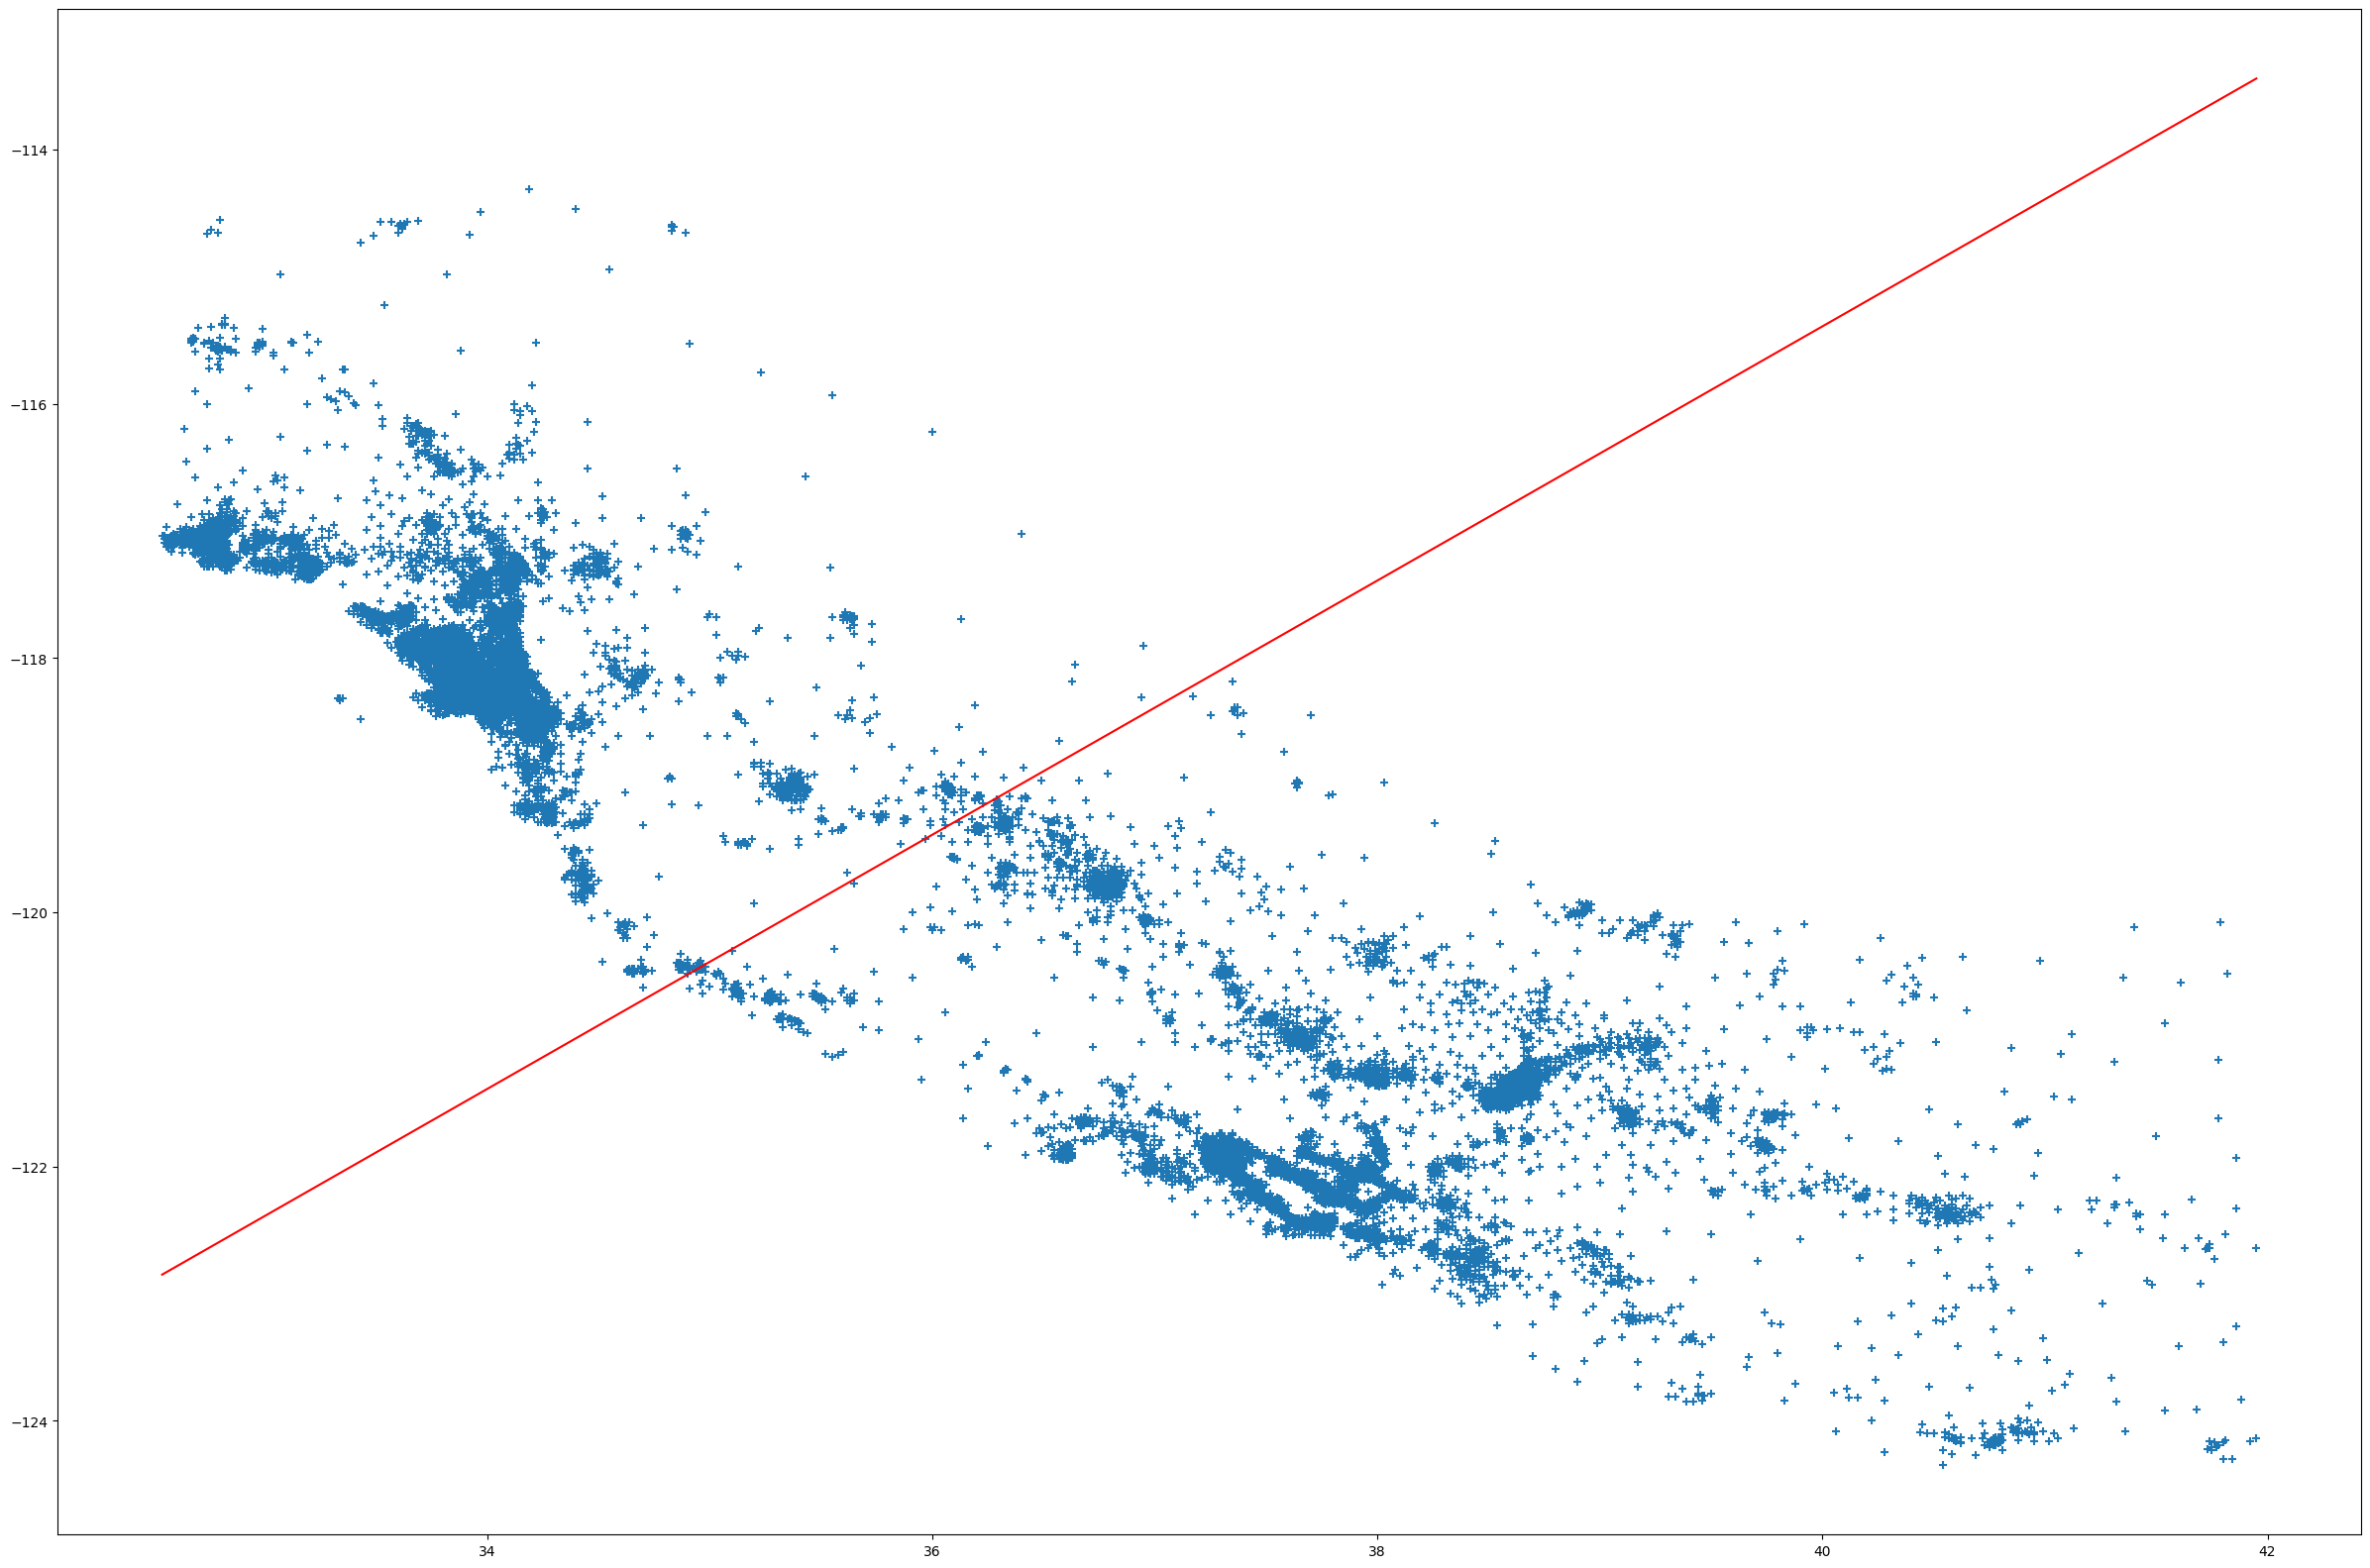

In [12]:
fig,axs=plt.subplots(1,figsize=(30,20))
axs.scatter(lat,lon,marker='+')
axs.plot(x_axis,y,color='red')

#Objective 2:Finding a Fair Line

Caculating fair line by minimizing the objective function over various lines and rotation of line along various points.

And plotting the line.

In [13]:
def sec_final(strtlat,endlat,strtlon,endlon):
    final_ans=[]
    curlat=strtlat
    while curlat<endlat+0.1:
        this_line=[]
        curlon=strtlon
        while curlon<endlon+0.1:
            this_point=[]
            for i in range(0,181,15):
                this_orn=0
                for p in range(len(lat)):
                    point=np.array([lat[p],lon[p]])
                    b=np.array([curlat,curlon])
                    a=np.array([1,math.tan(i*(math.pi)/180)])
                    this_orn=max(this_orn,calculate_I_AP(a,point,b))
                this_point.append(this_orn)
            this_line.append(np.array(this_point))
            curlon+=1.5
        final_ans.append(np.array(this_line))
        curlat+=1.5
    return np.array(final_ans)

calculated=sec_final(min(lat),max(lat),min(lon),max(lon))

getting appropriate value of lat,lon and theta for the function and then plotting the line for ojective 2

Minimum Cost: 46.06759999999998
Point b(latitude, longitude): (37.04, -119.85)
Angle made by the direction vector with the latitude axis: 45.0 Degrees.
0.9999999999999999


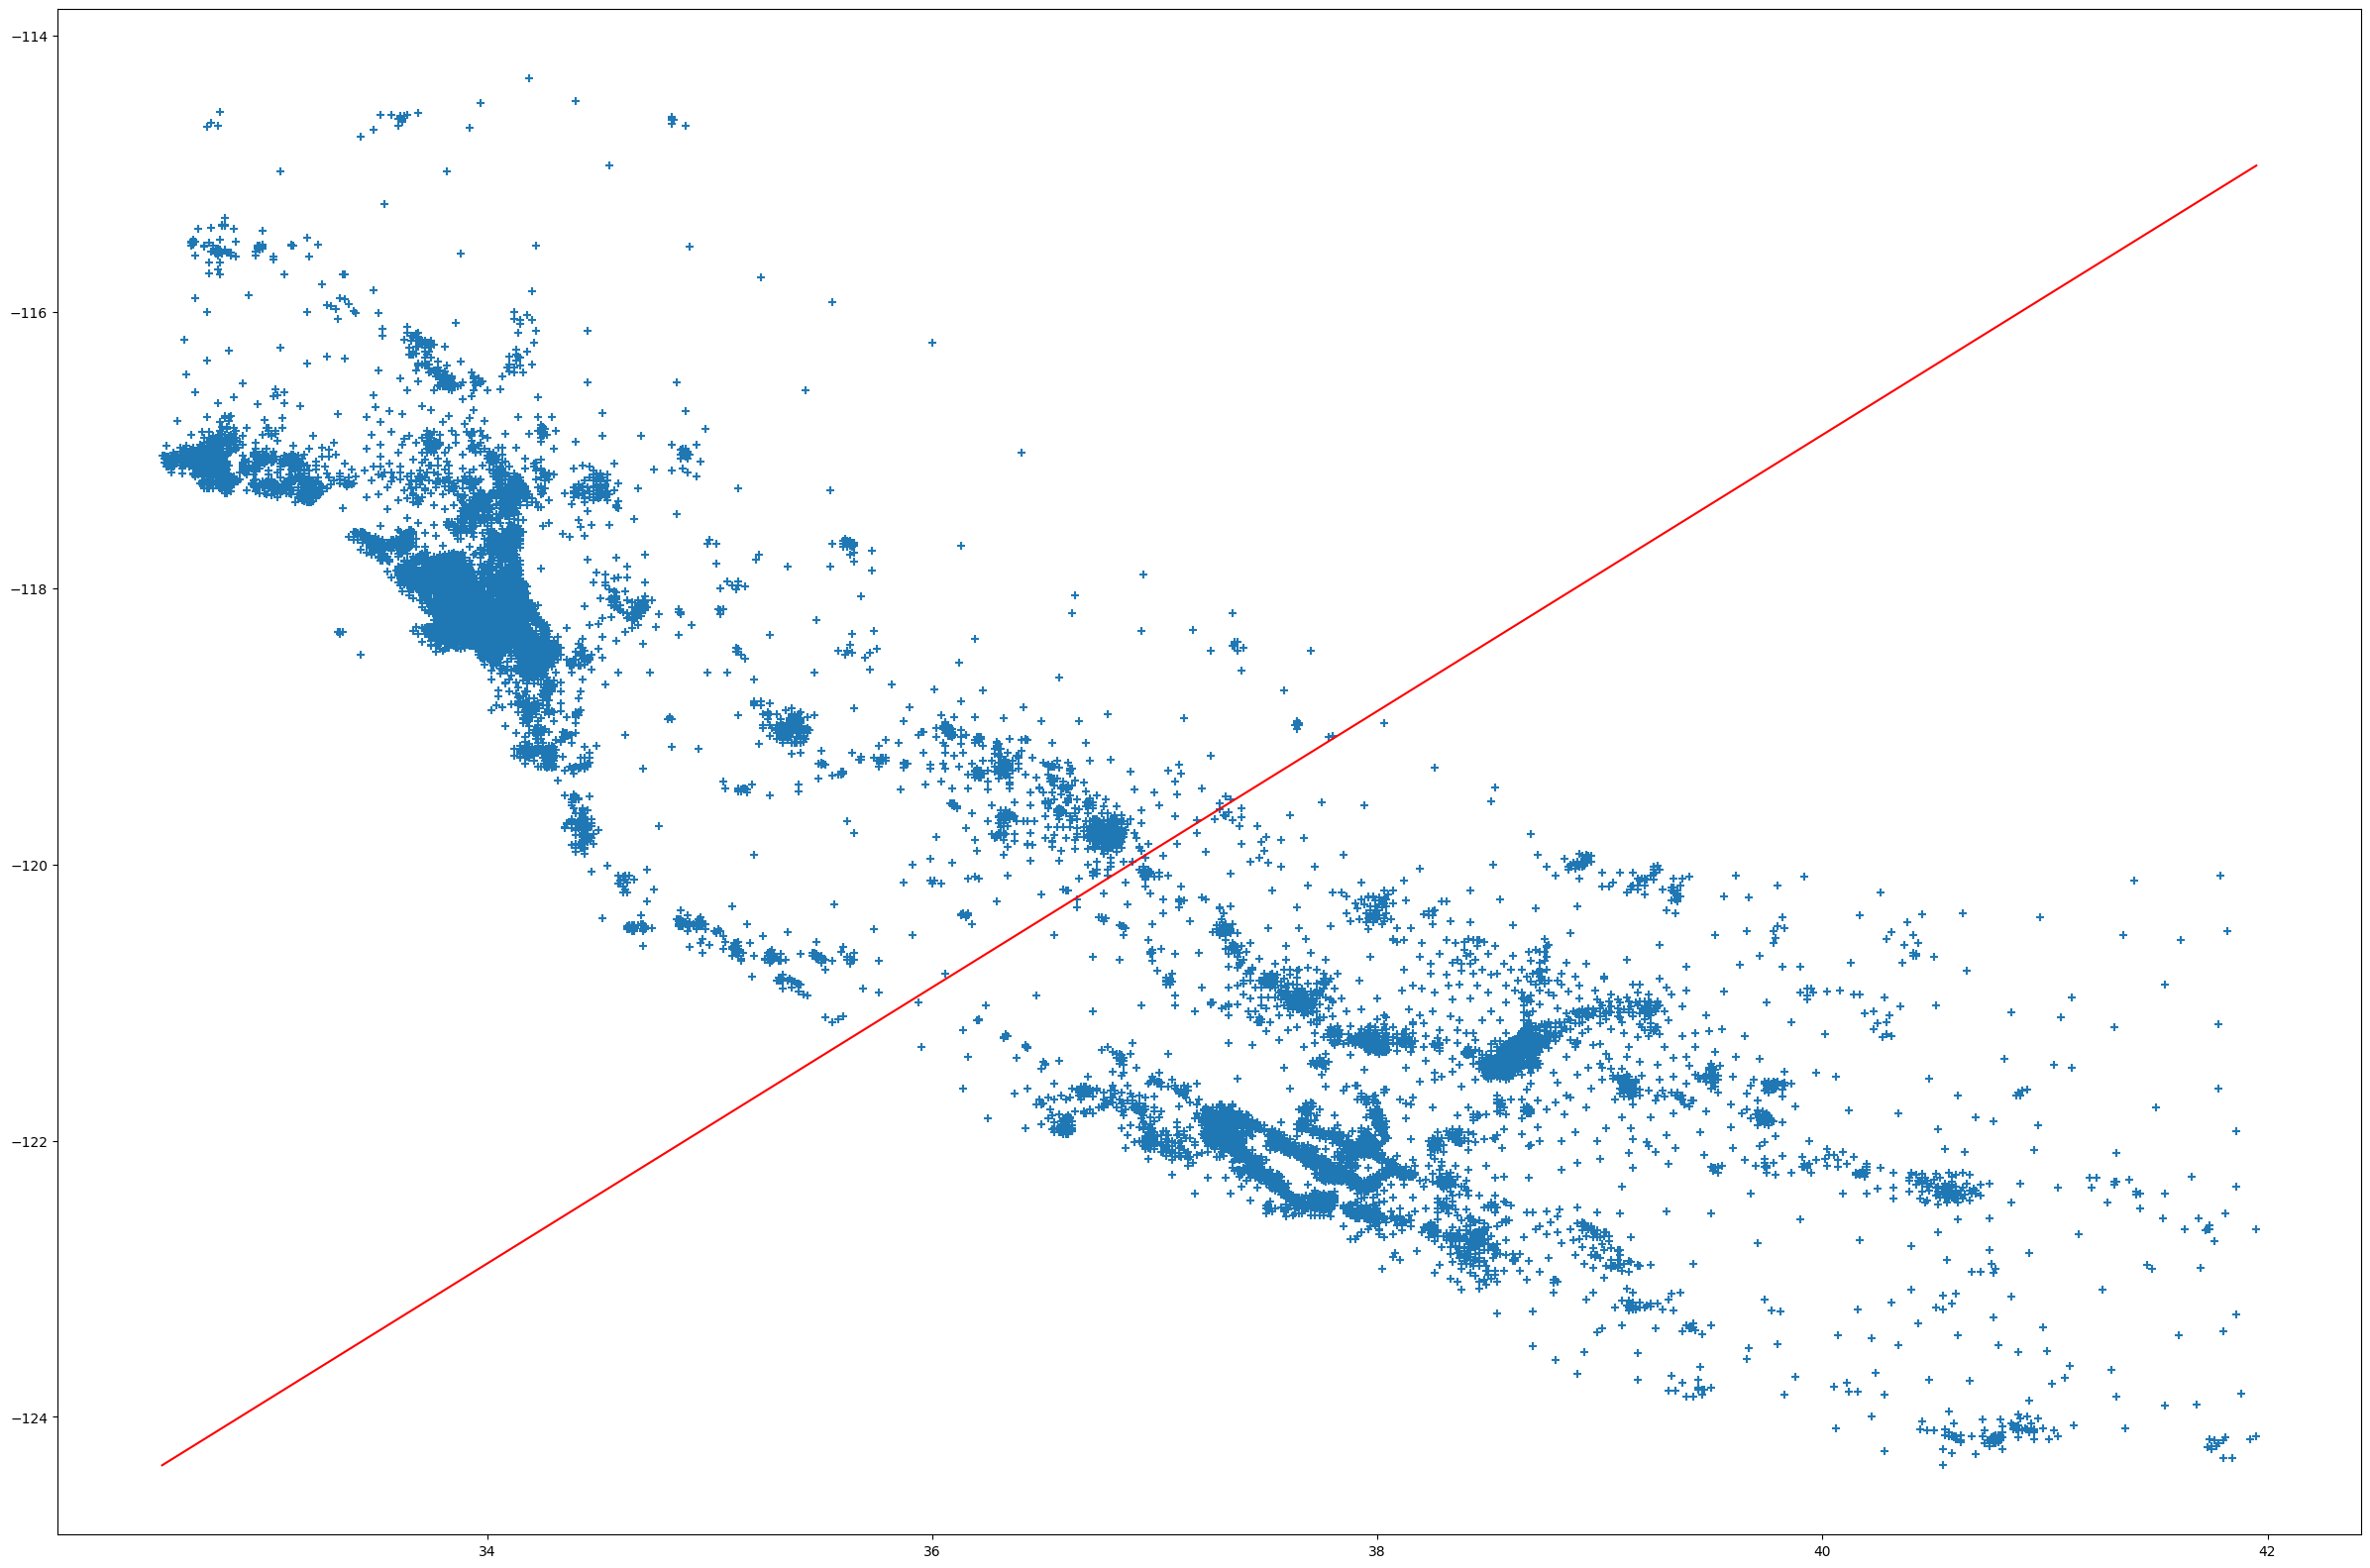

In [14]:
starters=np.array([min(lat),min(lon),0])
tba=[]
val=1e18
for i in range(calculated.shape[0]):
    for j in range(calculated.shape[1]):
        for k in range(calculated.shape[2]):
            if calculated[i][j][k]<val:
                val=calculated[i][j][k]
                tba=[1.5*i,1.5*j,k*15]
tba=np.array(tba)
starters=starters+tba
print("Minimum Cost:",val)
print("Point b(latitude, longitude):",(starters[0],starters[1]))
print("Angle made by the direction vector with the latitude axis:",starters[2],"Degrees.")


x_axis=np.linspace(min(lat),max(lat),10)
slope=math.tan(tba[2]*math.pi/180)
print(slope)
x=starters[0]
y=[starters[1]+(i-x)*slope for i in x_axis]
y=np.array(y)

fig,axs=plt.subplots(1,figsize=(30,20))
axs.scatter(lat,lon,marker='+')
axs.plot(x_axis,y,color='red')

#Objective 3: Multiple Efficient Lines

Finding multiple efficient lines is done by first clustering the datapoints into k clusters based on their distance metric (for the same we have used AgglomerativeClustering algorithm provided by the sklearn which effectively cluster data points based on distance) and then dealing with each cluster independently i.e applying the process identical to objective-1 on each cluster independently. This drastically reduces the cost.

inputting integers and AgglomerativeClustering (clustering algo we studied which ismade from k means clustering but keeping in mind for distance metric) this would be highly useful for our goal as we have to minimize distance.

In [15]:
k_=int(input("Enter the value of K:"))
let=np.column_stack((lat,lon))

clustering=AgglomerativeClustering(n_clusters=k)
clustering.fit(let)

labels=clustering.labels_


Enter the value of K:6


The third_final code is written in such a way for each cluster we made a cylendrical pipeline which return a point that has (lat,lon) and a theta for each k clusters

In [16]:
def third_final(strtlat,endlat,strtlon,endlon):
    final_ans=[]
    beglat=strtlat
    while beglat<endlat+0.1:
        this_line=[]
        beglon=strtlon
        while beglon<endlon+0.1:
            this_point=[]
            for i in range(0,181,15):
                this_orn=0
                for p in range(len(curlat)):
                    point=np.array([curlat[p],curlon[p]])
                    b=np.array([beglat,beglon])
                    a=np.array([1,math.tan(i*(math.pi)/180)])
                    this_orn+=calculate_I_AP(a,point,b)
                this_point.append(this_orn)
            this_line.append(np.array(this_point))
            beglon+=1.5
        final_ans.append(np.array(this_line))
        beglat+=1.5
    return np.array(final_ans)

This is for getting minimum value for each clusters and then getting equation of line for each clusters and plotting the line in each clusters


0.9999999999999999
x= 36.2
y= [-120.43 -120.06 -119.69 -119.32 -118.95 -118.58 -118.21 -117.84 -117.47
 -117.1 ]
0.9999999999999999
x= 37.5
y= [-122.35       -122.08555556 -121.82111111 -121.55666667 -121.29222222
 -121.02777778 -120.76333333 -120.49888889 -120.23444444 -119.97      ]
0.9999999999999999
x= 34.02
y= [-119.64       -119.41333333 -119.18666667 -118.96       -118.73333333
 -118.50666667 -118.28       -118.05333333 -117.82666667 -117.6       ]
0.2679491924311227
x= 33.33
y= [-118.4        -118.30859955 -118.21719911 -118.12579866 -118.03439821
 -117.94299777 -117.85159732 -117.76019687 -117.66879643 -117.57739598]
0.9999999999999999
x= 40.33
y= [-123.48       -123.13333333 -122.78666667 -122.44       -122.09333333
 -121.74666667 -121.4        -121.05333333 -120.70666667 -120.36      ]
0.5773502691896257
x= 34.17
y= [-116.0760254  -115.93361234 -115.79119927 -115.6487862  -115.50637314
 -115.36396007 -115.22154701 -115.07913394 -114.93672087 -114.79430781]


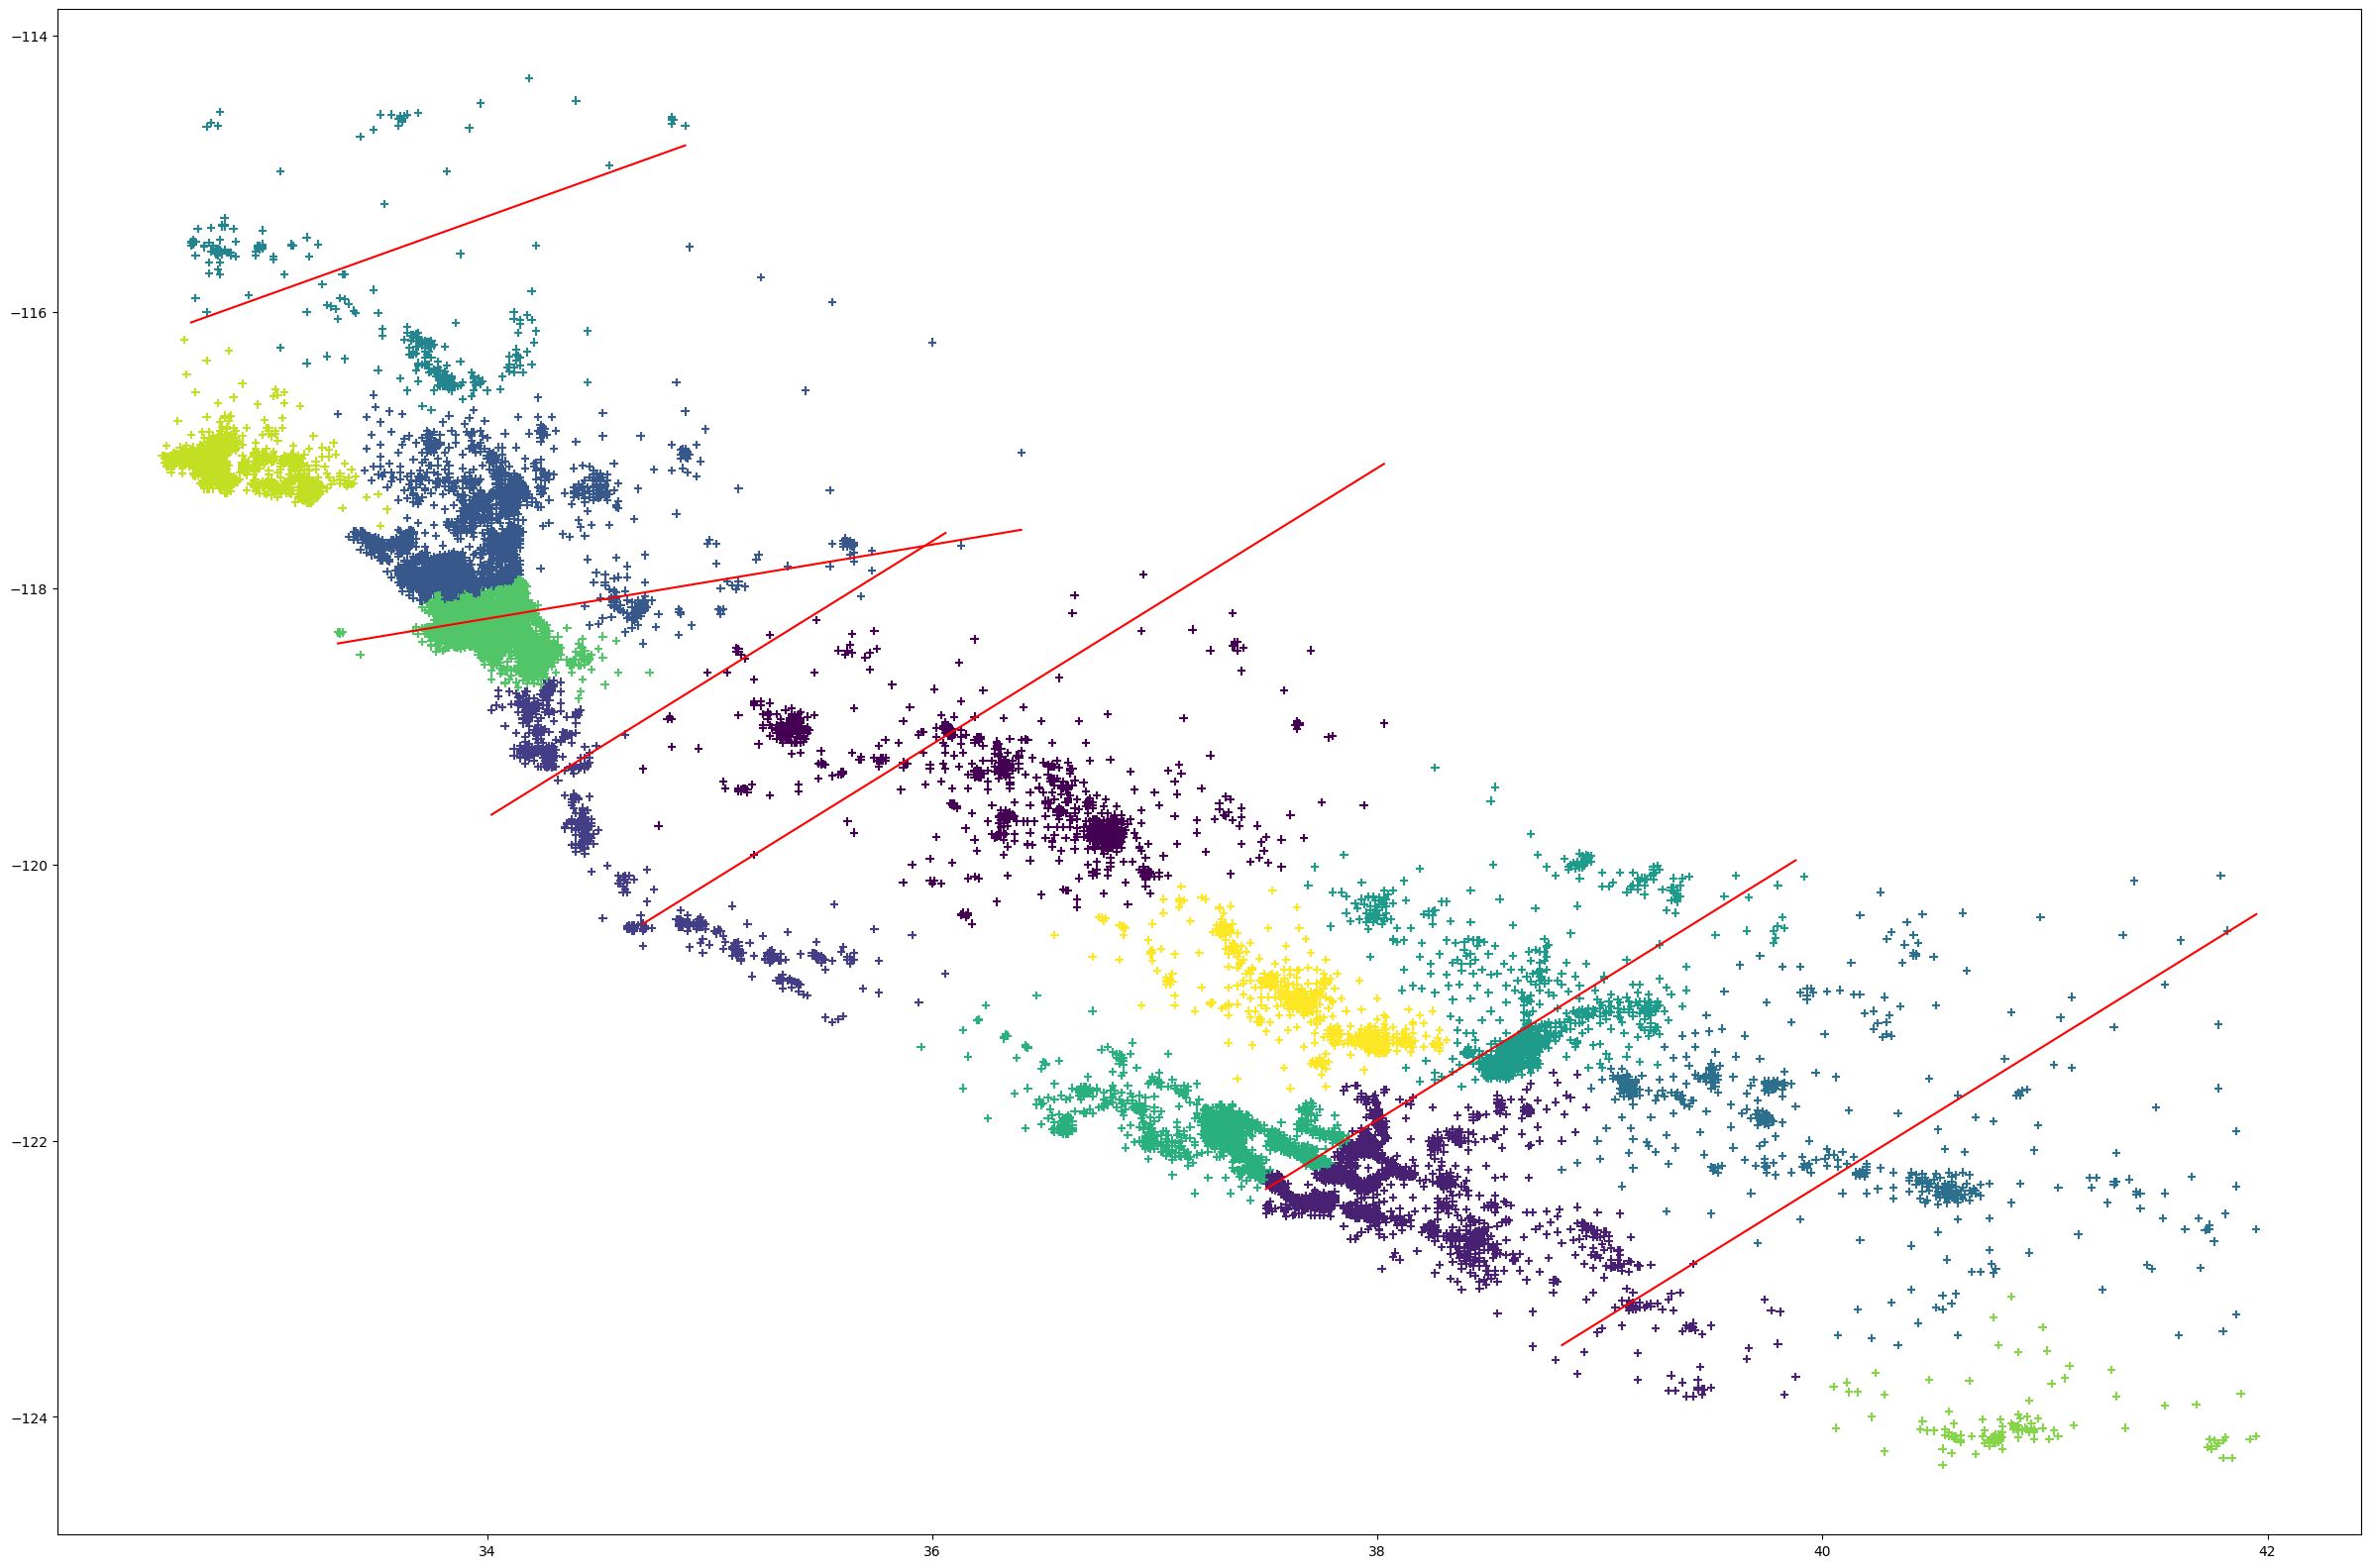

In [17]:
fig,axs=plt.subplots(1,figsize=(30,20))
axs.scatter(lat,lon,c=labels,cmap='viridis',marker='+')

minimum_cost=[]
points=[]
degree=[]

for i in range(k_):
    curlat=np.array(lat[labels==i]);curlon=np.array(lon[labels==i])
    calculated=third_final(min(curlat),max(curlat),min(curlon),max(curlon))

    starters=np.array([min(curlat),min(curlon),0])
    tba=[]
    val=1e18
    for i in range(calculated.shape[0]):
        for j in range(calculated.shape[1]):
            for k in range(calculated.shape[2]):
                if calculated[i][j][k]<val:
                    val=calculated[i][j][k]
                    tba=[1.5*i,1.5*j,k*15]
    tba=np.array(tba)
    starters=starters+tba
    minimum_cost.append(val)
    points.append((starters[0],starters[1]))
    degree.append(starters[2])

    x_axis=np.linspace(min(curlat),max(curlat),10)
    slope=math.tan(tba[2]*math.pi/180)
    print(slope)
    x=starters[0]
    y=[starters[1]+(i-x)*slope for i in x_axis]
    y=np.array(y)
    print("x=",x)
    print("y=",y)
    axs.plot(x_axis,y,color='red')

In [18]:
print("Point b for each cluster (latitude,longitude):",points)
print("Angle with latitude axis made by line:",degree)
print("Cost for each cluster:",minimum_cost)
print("Total cost for all clusters:",sum(minimum_cost))

Point b for each cluster (latitude,longitude): [(36.2, -118.93), (37.5, -122.35), (34.02, -119.64), (33.33, -118.4), (40.33, -121.98), (34.17, -115.21)]
Angle with latitude axis made by line: [45.0, 45.0, 45.0, 15.0, 45.0, 30.0]
Cost for each cluster: [1057.0203999999922, 1516.4812000000077, 794.732699999996, 570.403054303106, 533.4119000000002, 218.05816666666692]
Total cost for all clusters: 4690.107420969768
